<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/Credit_Card_Spend_Trend_21Aug2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code To Analyse Credit Card Spending Details.... 21 August 2020

In [1]:
# To access your CSV file from your Google Drive:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import Libraries and Load Your CSV
import pandas as pd

# File path from your Google Drive
file_path = '/content/drive/My Drive/DA_Practise_Folder_EXCEL/Credit Card Spending in India.csv'

# Load the data
df = pd.read_csv(file_path)

# Preview the data
df.head()


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574


In [3]:
# Basic Data Analysis
# Total number of records
print("Total records:", len(df))

# Column names
print("\nColumns:", df.columns.tolist())

# Unique cities
print("\nUnique Cities:", df['City'].unique())

# Total and average amount
print("\nTotal Amount:", df['Amount'].sum())
print("Average Amount:", df['Amount'].mean())

# Highest and lowest amount
print("Max Amount:", df['Amount'].max())
print("Min Amount:", df['Amount'].min())

# Group by City
print("\nSpending by City:")
print(df.groupby('City')['Amount'].sum())

# Group by Card Type
print("\nSpending by Card Type:")
print(df.groupby('Card Type')['Amount'].sum())


Total records: 101

Columns: ['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount']

Unique Cities: ['Delhi, India' 'Greater Mumbai, India' 'Bengaluru, India'
 'Ahmedabad, India']

Total Amount: 52277583
Average Amount: 517599.8316831683
Max Amount: 998077
Min Amount: 19226

Spending by City:
City
Ahmedabad, India         11231805
Bengaluru, India          9881486
Delhi, India             13094797
Greater Mumbai, India    18069495
Name: Amount, dtype: int64

Spending by Card Type:
Card Type
Gold         15111818
Platinum     18351549
Signature    10758767
Silver        8055449
Name: Amount, dtype: int64


In [5]:
#Clean Column Names (if needed)
df.columns = df.columns.str.strip()  # Remove extra spaces


In [6]:
# . Clean the Date Column
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df.head()


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


In [7]:
# Check for missing values:
df.isnull().sum()


,0
index,0
City,0
Date,0
Card Type,0
Exp Type,0
Gender,0
Amount,0


<Axes: title={'center': 'Monthly Credit Card Spending'}, xlabel='Month'>

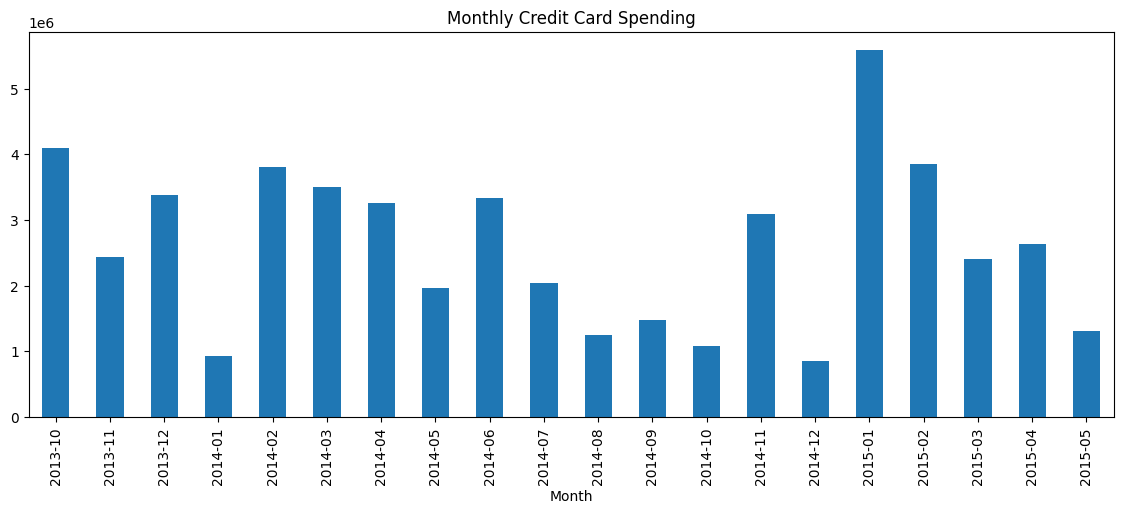

In [8]:
# Spending Over Time (Monthly/Yearly Trends)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')  # For cleaner plots

monthly_spend = df.groupby('Month')['Amount'].sum()
monthly_spend.plot(kind='bar', figsize=(14, 5), title='Monthly Credit Card Spending')


<Axes: title={'center': 'Monthly Spending by City'}, xlabel='Month'>

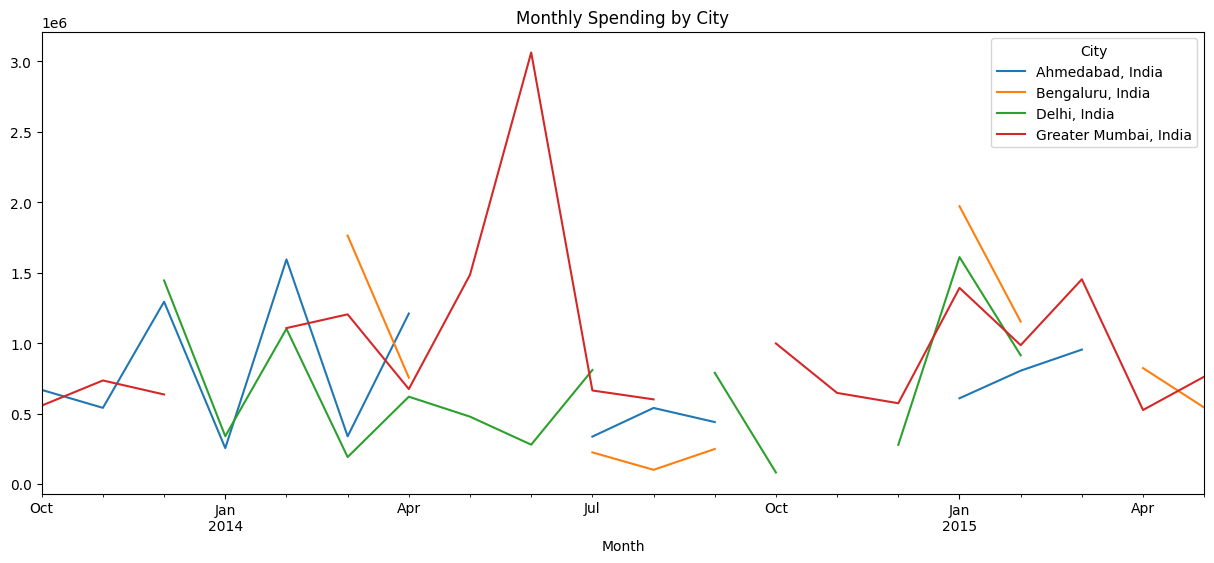

In [9]:
# City-Wise Spending Trends Over Time
city_monthly = df.groupby(['City', 'Month'])['Amount'].sum().unstack(0)
city_monthly.plot(figsize=(15, 6), title='Monthly Spending by City')


<Axes: title={'center': 'Total Spending by Card Type'}, ylabel='Amount'>

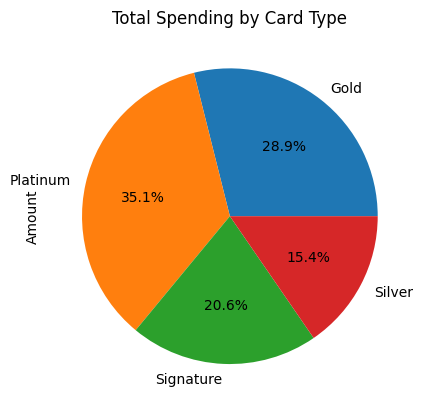

In [10]:
# Card Type Performance
card_summary = df.groupby('Card Type')['Amount'].sum()
card_summary.plot(kind='pie', autopct='%1.1f%%', title='Total Spending by Card Type')


In [11]:
# Top 5 Biggest Transactions
df.nlargest(5, 'Amount')


,index,City,Date,Card Type,Exp Type,Gender,Amount,Year,Month
80,80,"Greater Mumbai, India",2014-10-14,Platinum,Bills,F,998077,2014,2014-10
68,68,"Greater Mumbai, India",2014-03-22,Gold,Bills,F,991685,2014,2014-03
28,28,"Bengaluru, India",2015-01-18,Platinum,Bills,F,987935,2015,2015-01
17,17,"Greater Mumbai, India",2015-03-30,Gold,Bills,F,986379,2015,2015-03
92,92,"Bengaluru, India",2015-01-19,Platinum,Bills,F,983839,2015,2015-01


In [12]:
# Spending by Year
df.groupby(df['Date'].dt.year)['Amount'].sum()


,Amount
Date,
2013,9905058
2014,26582181
2015,15790344


In [13]:
# Spending by Month Across All Years
df['Month_Num'] = df['Date'].dt.month
df.groupby('Month_Num')['Amount'].sum().sort_index()


,Amount
Month_Num,
1,6508043
2,7662249
3,5907387
4,5895077
5,3270129
6,3342344
7,2036999
8,1243715
9,1480096


In [17]:
# Time Between Transaction
df_sorted = df.sort_values('Date')
df_sorted['Days_Since_Last'] = df_sorted['Date'].diff().dt.days


<Axes: xlabel='City'>

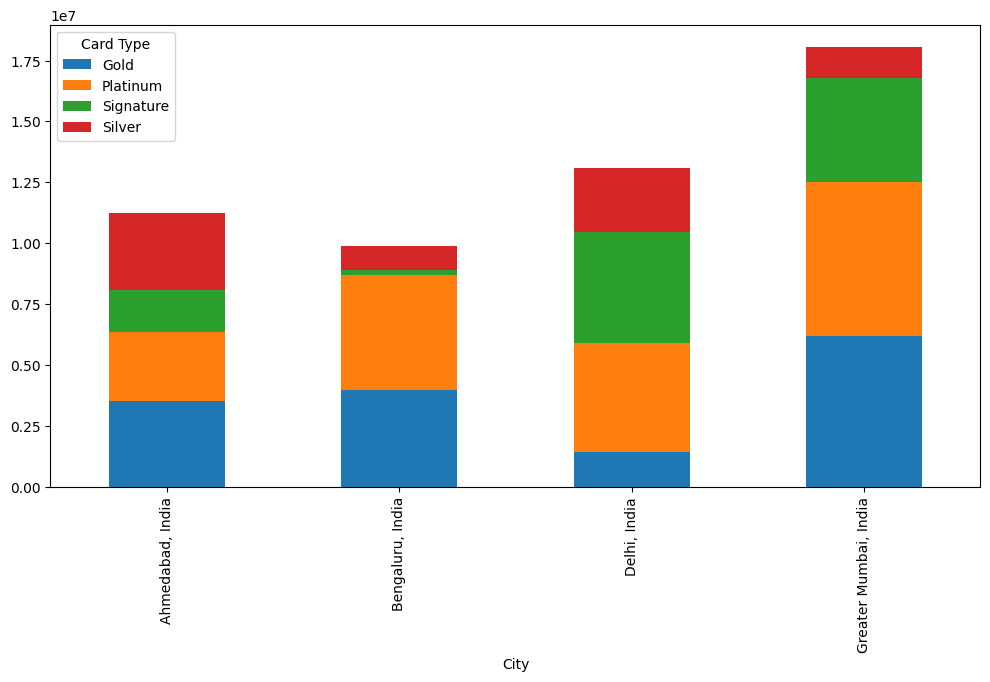

In [18]:
# Most Used Card Type per City
df.groupby(['City', 'Card Type'])['Amount'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12,6))


In [19]:
# Average Spend per Transaction by City
df.groupby('City')['Amount'].mean().sort_values(ascending=False)


,Amount
City,
"Ahmedabad, India",561590.250000
"Greater Mumbai, India",531455.735294
"Bengaluru, India",494074.300000
"Delhi, India",484992.481481


In [20]:
# Top 10 Highest Transactions
df.nlargest(10, 'Amount')


,index,City,Date,Card Type,Exp Type,Gender,Amount,Year,Month,Month_Num
80,80,"Greater Mumbai, India",2014-10-14,Platinum,Bills,F,998077,2014,2014-10,10
68,68,"Greater Mumbai, India",2014-03-22,Gold,Bills,F,991685,2014,2014-03,3
28,28,"Bengaluru, India",2015-01-18,Platinum,Bills,F,987935,2015,2015-01,1
17,17,"Greater Mumbai, India",2015-03-30,Gold,Bills,F,986379,2015,2015-03,3
92,92,"Bengaluru, India",2015-01-19,Platinum,Bills,F,983839,2015,2015-01,1
35,35,"Ahmedabad, India",2015-03-24,Platinum,Bills,F,954660,2015,2015-03,3
81,81,"Ahmedabad, India",2014-02-02,Silver,Bills,F,934205,2014,2014-02,2
58,58,"Delhi, India",2013-10-08,Platinum,Bills,F,900101,2013,2013-10,10
96,96,"Bengaluru, India",2013-11-01,Gold,Bills,F,896384,2013,2013-11,11
46,46,"Ahmedabad, India",2013-12-10,Gold,Bills,F,892016,2013,2013-12,12


In [21]:
# Transactions Above 90th Percentile
threshold = df['Amount'].quantile(0.9)
df[df['Amount'] > threshold]



,index,City,Date,Card Type,Exp Type,Gender,Amount,Year,Month,Month_Num
17,17,"Greater Mumbai, India",2015-03-30,Gold,Bills,F,986379,2015,2015-03,3
28,28,"Bengaluru, India",2015-01-18,Platinum,Bills,F,987935,2015,2015-01,1
35,35,"Ahmedabad, India",2015-03-24,Platinum,Bills,F,954660,2015,2015-03,3
46,46,"Ahmedabad, India",2013-12-10,Gold,Bills,F,892016,2013,2013-12,12
58,58,"Delhi, India",2013-10-08,Platinum,Bills,F,900101,2013,2013-10,10
68,68,"Greater Mumbai, India",2014-03-22,Gold,Bills,F,991685,2014,2014-03,3
80,80,"Greater Mumbai, India",2014-10-14,Platinum,Bills,F,998077,2014,2014-10,10
81,81,"Ahmedabad, India",2014-02-02,Silver,Bills,F,934205,2014,2014-02,2
92,92,"Bengaluru, India",2015-01-19,Platinum,Bills,F,983839,2015,2015-01,1
96,96,"Bengaluru, India",2013-11-01,Gold,Bills,F,896384,2013,2013-11,11


In [22]:
# Card Type Performance
df.groupby('Card Type')['Amount'].mean()


,Amount
Card Type,
Gold,539707.785714
Platinum,556107.545455
Signature,467772.478261
Silver,473849.941176


In [23]:
# Count of Transactions by Card Type
df['Card Type'].value_counts()


,count
Card Type,
Platinum,33
Gold,28
Signature,23
Silver,17


In [24]:
# Expense Type Filtering
df['Exp Type'].value_counts()


,count
Exp Type,
Bills,101


Exp Type
Bills    101
Name: count, dtype: int64


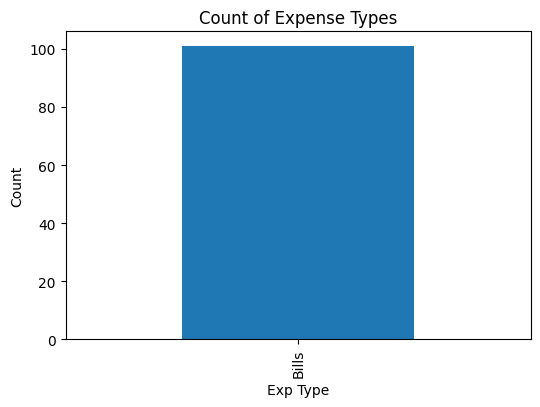

In [33]:
# Count of expense types
exp_type_counts = df['Exp Type'].value_counts()
print(exp_type_counts)

exp_type_counts.plot(kind='bar', figsize=(6,4), title='Count of Expense Types')
plt.ylabel('Count')
plt.show()


Transaction_Category
Low       34
High      34
Medium    33
Name: count, dtype: int64


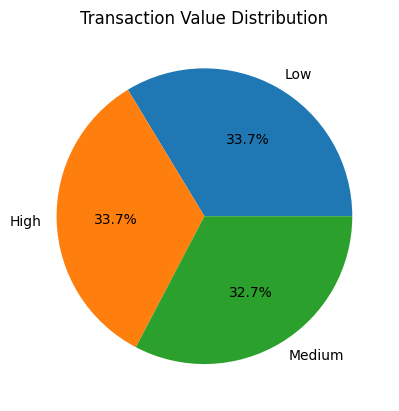

In [34]:
# Transaction Value Distribution
quantiles = df['Amount'].quantile([0.33, 0.66])
def categorize(amount):
    if amount <= quantiles[0.33]:
        return 'Low'
    elif amount <= quantiles[0.66]:
        return 'Medium'
    else:
        return 'High'

df['Transaction_Category'] = df['Amount'].apply(categorize)
category_counts = df['Transaction_Category'].value_counts()
print(category_counts)

category_counts.plot(kind='pie', autopct='%1.1f%%', title='Transaction Value Distribution')
plt.ylabel('')
plt.show()


In [35]:
# Outliers: transactions above 90th percentile
threshold_90 = df['Amount'].quantile(0.9)
high_transactions = df[df['Amount'] > threshold_90]
print(high_transactions)


    index                   City       Date Card Type Exp Type Gender  Amount  \
17     17  Greater Mumbai, India 2015-03-30      Gold    Bills      F  986379   
28     28       Bengaluru, India 2015-01-18  Platinum    Bills      F  987935   
35     35       Ahmedabad, India 2015-03-24  Platinum    Bills      F  954660   
46     46       Ahmedabad, India 2013-12-10      Gold    Bills      F  892016   
58     58           Delhi, India 2013-10-08  Platinum    Bills      F  900101   
68     68  Greater Mumbai, India 2014-03-22      Gold    Bills      F  991685   
80     80  Greater Mumbai, India 2014-10-14  Platinum    Bills      F  998077   
81     81       Ahmedabad, India 2014-02-02    Silver    Bills      F  934205   
92     92       Bengaluru, India 2015-01-19  Platinum    Bills      F  983839   
96     96       Bengaluru, India 2013-11-01      Gold    Bills      F  896384   

    Year    Month Transaction_Category  
17  2015  2015-03                 High  
28  2015  2015-01         

In [36]:
#  Group customers (here, just city-card type combo) by average spend and count
segmentation = df.groupby(['City', 'Card Type']).agg(
    avg_spend=('Amount', 'mean'),
    transaction_count=('Amount', 'count')
).sort_values(by='avg_spend', ascending=False)
print(segmentation)


                                     avg_spend  transaction_count
City                  Card Type                                  
Ahmedabad, India      Gold       708100.400000                  5
Bengaluru, India      Platinum   672577.285714                  7
Ahmedabad, India      Silver     632457.800000                  5
Greater Mumbai, India Gold       618829.200000                 10
Delhi, India          Signature  566283.250000                  8
Ahmedabad, India      Platinum   564267.800000                  5
Greater Mumbai, India Platinum   525889.166667                 12
Delhi, India          Platinum   501277.666667                  9
Greater Mumbai, India Signature  477270.444444                  9
Bengaluru, India      Gold       441740.444444                  9
Delhi, India          Silver     440945.333333                  6
Greater Mumbai, India Silver     425033.000000                  3
Delhi, India          Gold       351840.000000                  4
Ahmedabad,

In [37]:
# Flag transactions unusually high compared to city average (e.g., 2x avg)
city_avg_amount = df.groupby('City')['Amount'].mean()

def is_outlier(row):
    return row['Amount'] > 2 * city_avg_amount[row['City']]

df['Is_Outlier'] = df.apply(is_outlier, axis=1)
outliers = df[df['Is_Outlier']]
print(outliers)


Empty DataFrame
Columns: [index, City, Date, Card Type, Exp Type, Gender, Amount, Year, Month, Transaction_Category, Is_Outlier]
Index: []


In [39]:
# Date Check
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')


In [40]:
# group the data by month to prepare for forecasting:
# Extract month from date
df['Month'] = df['Date'].dt.to_period('M')

# Group by month and get total amount
monthly_spending = df.groupby('Month')['Amount'].sum().reset_index()

# Convert period to timestamp for plotting
monthly_spending['Month'] = monthly_spending['Month'].dt.to_timestamp()

monthly_spending.head()


,Month,Amount
0,2013-10-01,4090700
1,2013-11-01,2438695
2,2013-12-01,3375663
3,2014-01-01,923657
4,2014-02-01,3804083


In [41]:
# Prepare Data for the Forecasting Model
# Create a numerical feature for the month (like 0, 30, 60, ...)
monthly_spending['Month_Num'] = (monthly_spending['Month'] - monthly_spending['Month'].min()).dt.days

# Features (X) and Target (y)
X = monthly_spending[['Month_Num']]
y = monthly_spending['Amount']

X.head()


,Month_Num
0,0
1,31
2,61
3,92
4,123


In [42]:
# Train the Forecasting Model
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Optional: Print slope and intercept
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (coefficient): -1035.827524338
Intercept: 2913181.513157465


In [43]:
# Predict the Next 6 Months
import numpy as np
import pandas as pd

# Generate the next 6 months
last_day = monthly_spending['Month_Num'].max()
future_days = np.array([last_day + i*30 for i in range(1, 7)]).reshape(-1, 1)  # Approx. 30 days per month

# Predict using the model
future_preds = model.predict(future_days)

# Generate future dates
last_date = monthly_spending['Month'].max()
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=6, freq='MS')

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Month': future_dates,
    'Predicted_Amount': future_preds.astype(int)
})

forecast_df


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Month,Predicted_Amount
0,2015-06-01,2284434
1,2015-07-01,2253359
2,2015-08-01,2222284
3,2015-09-01,2191209
4,2015-10-01,2160134
5,2015-11-01,2129060


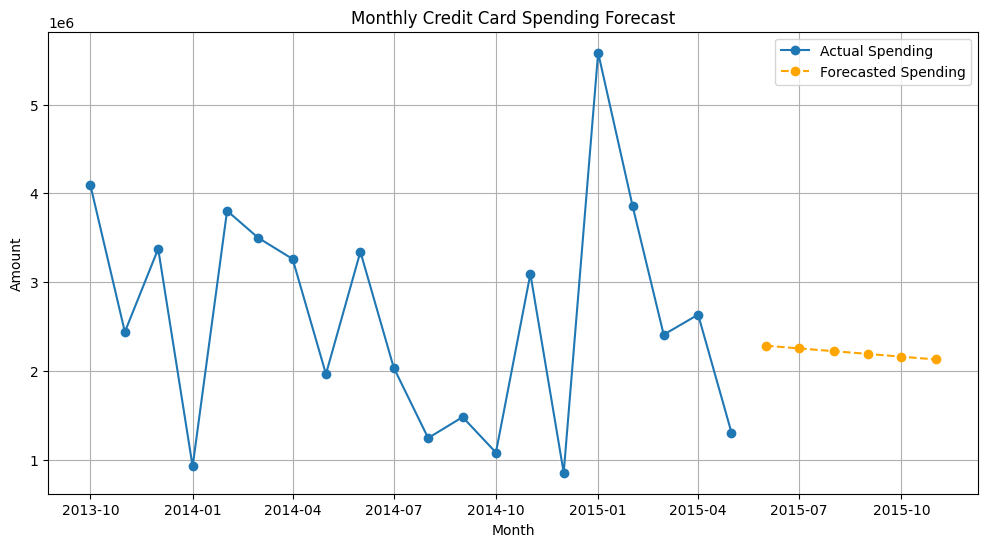

In [44]:
# Visualize Actual + Forecasted Spending
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot historical spending
plt.plot(monthly_spending['Month'], y, label='Actual Spending', marker='o')

# Plot forecasted spending
plt.plot(forecast_df['Month'], forecast_df['Predicted_Amount'], label='Forecasted Spending', marker='o', linestyle='--', color='orange')

plt.title('Monthly Credit Card Spending Forecast')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()
